# Desarrollo memoria

### Importaciones de librerías

In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import gc

# 
import datetime

# Tensorflow GPU config
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

# Jupyter stuff
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.text_cell_render p, .text_cell_render li { font-size: 13pt !important; }</style>"))
display(HTML("<style>.text_cell_render li { margin: 0 0 10px 0; }</style>"))

## Cargando el df

In [2]:
# Se importa el dataset
df = pd.read_csv("./datasets/mediciones-netatmo-renam.csv") 

In [3]:
display(df.head(5))
print(df.shape)
print("Mostrando los nulos")
display(df.isnull().sum())

,id,user_id,dispositivo_id,sector,temperatura,humedad,co2,ruido,measured_at,local_measured_at,js_measured_at,created_at,updated_at,vivienda_id
0,523815,127.0,2.0,0,16.5,77.0,1080.0,37.0,1494644400,2017-05-13 00:00:00,1494644400000,1494648008,1494648008,6
1,523816,127.0,2.0,0,16.4,77.0,1074.0,37.0,1494646200,2017-05-13 00:30:00,1494646200000,1494648008,1494648008,6
2,523817,113.0,3.0,0,15.7,73.0,891.0,38.0,1494644400,2017-05-13 00:00:00,1494644400000,1494648012,1494648012,9
3,523818,113.0,3.0,0,15.6,73.0,894.0,37.0,1494646200,2017-05-13 00:30:00,1494646200000,1494648012,1494648012,9
4,523819,109.0,4.0,0,21.0,75.0,3991.0,59.0,1494644400,2017-05-13 00:00:00,1494644400000,1494648016,1494648016,11


(10169108, 14)
Mostrando los nulos


id                         0
user_id               299473
dispositivo_id        156446
sector                     0
temperatura              210
humedad                  210
co2                  4726543
ruido                4725843
measured_at                0
local_measured_at          0
js_measured_at             0
created_at                 0
updated_at                 0
vivienda_id                0
dtype: int64

Al ver el dataset se aprecia que hay 10169108 registros con 14 columnas cada uno. Resulta que la caracteristica sector indica 0 si es que la medicion es dentro de la casa o 1 si es que es fuera de ésta, para usos de esta memoria se determina que las mediciones dentro de la casa y fuera de esta deben de vivir en el mismo registro por lo que se carga el csv en una base de datos (postgres, ver anexo)  y se decide realizar dicha unificación, así es como se obtiene el nuevo dataset *'mediciones_unificadas.csv'*

In [2]:
try:
    del df
except:
    print("No hay df definido :(")
gc.collect()

df = pd.read_csv("./datasets/mediciones_unificadas.csv") 
# df.date_measured_at = pd.to_datetime(df.measured_at, unit='s')
df.date_measured_at = pd.to_datetime(df.date_measured_at)

No hay df definido :(


In [5]:
display(df.head(5))
print("INFO DE LOS DATOS")
display(df.describe())
print("CANTIDAD DE NULOS POR ATRIBUTO")
display(df.isnull().sum())
print(df.shape)
print("Viviendas distintas:",len(df.vivienda_id.unique()))

,id,dispositivo_id,vivienda_id,temperatura_interior,humedad_interior,co2,ruido,temperatura_exterior,humedad_exterior,measured_at,date_measured_at
0,1,NaN,3,26.3,48,NaN,NaN,27.5,35,1448569800,2015-11-26 20:30:00
1,2,NaN,3,25.2,47,42.0,66.0,25.4,35,1448571600,2015-11-26 21:00:00
2,3,NaN,3,23.9,45,130.0,59.0,23.4,38,1448573400,2015-11-26 21:30:00
3,4,NaN,3,23.3,46,278.0,44.0,22.4,38,1448575200,2015-11-26 22:00:00
4,5,NaN,3,24.0,46,399.0,44.0,21.5,39,1448577000,2015-11-26 22:30:00


INFO DE LOS DATOS


,id,dispositivo_id,vivienda_id,temperatura_interior,humedad_interior,co2,ruido,temperatura_exterior,humedad_exterior,measured_at
count,4.731498e+06,4.653350e+06,4.731498e+06,4.731498e+06,4.731498e+06,4.731333e+06,4.731352e+06,4.731498e+06,4.731498e+06,4.731498e+06
mean,2.365750e+06,1.497018e+02,1.468023e+02,1.983571e+01,5.841729e+01,6.553012e+02,4.434105e+01,1.660592e+01,6.643283e+01,1.517827e+09
std,1.365866e+06,8.465548e+01,8.426349e+01,4.103601e+00,1.130619e+01,6.458876e+02,8.948838e+00,6.370523e+00,1.518488e+01,1.865352e+07
min,1.000000e+00,1.000000e+00,2.000000e+00,2.300000e+00,8.000000e+00,0.000000e+00,3.300000e+01,-1.580000e+01,1.300000e+01,1.448570e+09
25%,1.182875e+06,7.900000e+01,7.600000e+01,1.700000e+01,5.100000e+01,4.110000e+02,3.700000e+01,1.220000e+01,5.600000e+01,1.504723e+09
50%,2.365750e+06,1.480000e+02,1.420000e+02,1.980000e+01,5.900000e+01,5.170000e+02,4.200000e+01,1.610000e+01,6.800000e+01,1.517013e+09
75%,3.548624e+06,2.150000e+02,2.140000e+02,2.280000e+01,6.600000e+01,7.560000e+02,5.000000e+01,2.060000e+01,7.800000e+01,1.531822e+09
max,4.731498e+06,3.100000e+02,3.070000e+02,5.800000e+01,1.000000e+02,5.000000e+03,9.500000e+01,5.480000e+01,1.000000e+02,1.554253e+09


CANTIDAD DE NULOS POR ATRIBUTO


id                          0
dispositivo_id          78148
vivienda_id                 0
temperatura_interior        0
humedad_interior            0
co2                       165
ruido                     146
temperatura_exterior        0
humedad_exterior            0
measured_at                 0
date_measured_at            0
dtype: int64

(4731498, 11)
Viviendas distintas: 303


Ahora al ver el nuevo dataset unificado se aprecia que hay 4731498 registros, estos de un total de 303 viviendas distintas. Se aprecia que hay una gran cantidad de registros con dispositivo_id nulos, pero esto no es relevante ya que no es una variable a utilizar en el análisis. Hay unos pocos registros con nulos en variables revelantes como co2 y ruido (todo al interior de la casa)

Se va a proceder a sacar una muestra del orden del 10% de los datos para poder graficar las variables

In [6]:
df_sample = df.sample(frac=0.03, replace=False, random_state=23)

In [7]:
def temporada(a):
    fecha = pd.to_datetime(a)
    year = fecha.year
    otoño = (datetime.datetime(year, 3, 20), datetime.datetime(year, 6, 21))
    invierno = (datetime.datetime(year, 6, 21), datetime.datetime(year, 9, 23))
    primavera = (datetime.datetime(year, 9, 23), datetime.datetime(year, 12, 21))
    
    if otoño[0] <= fecha < otoño[1]:
        return "otoño"
    elif invierno[0] <= fecha < invierno[1]:
        return "invierno"
    elif primavera[0] <= fecha < primavera[1]:
        return "primavera"
    else:
        return "verano"
    
df_sample['epoca'] = np.vectorize(temporada)(df_sample['date_measured_at'])

In [9]:
print("Mostrando la forma de la muestra")
print(df_sample.shape)

Mostrando la forma de la muestra
(141945, 12)


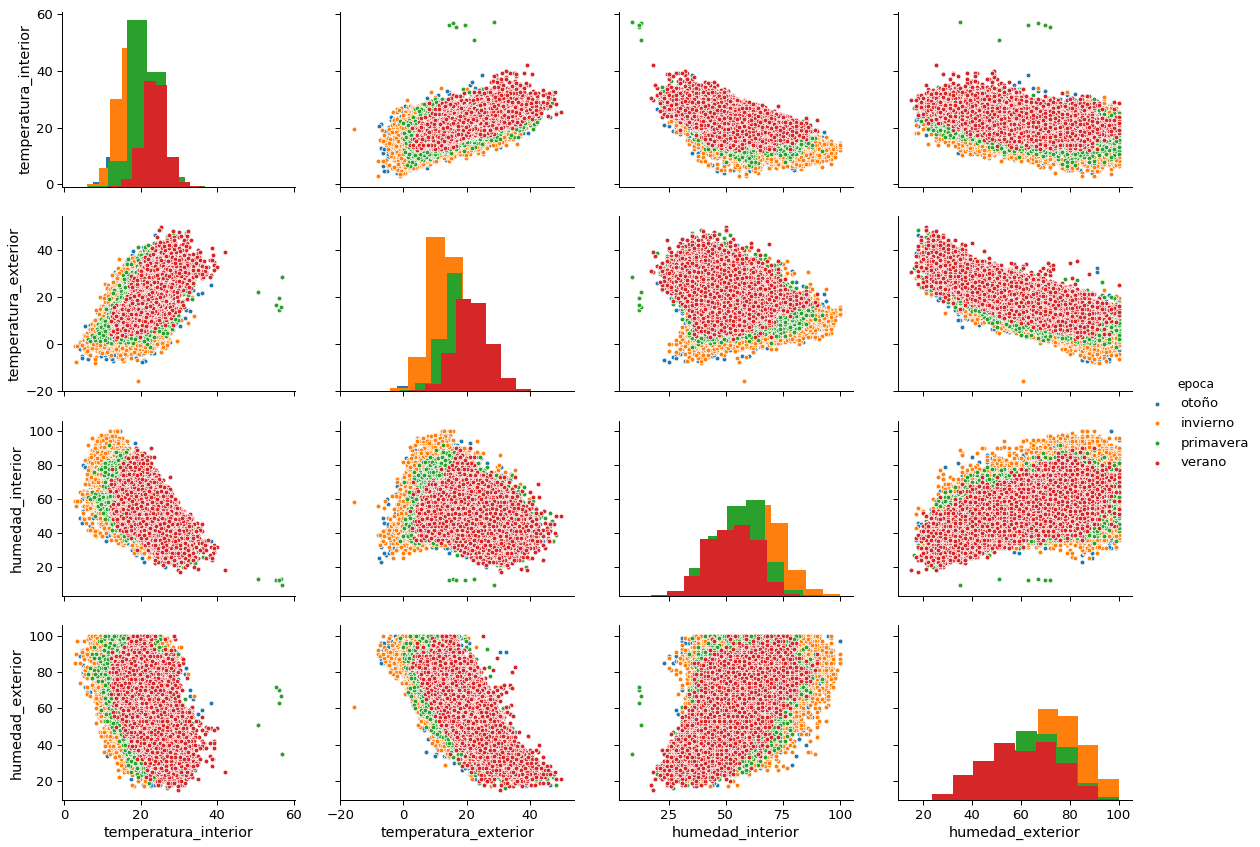

In [10]:
# VARIABLES = ['temperatura_interior', 'temperatura_exterior', 'humedad_interior', 'humedad_exterior', 'co2', 'ruido']
VARIABLES = ['temperatura_interior', 'temperatura_exterior', 'humedad_interior', 'humedad_exterior']
sns.set_context("paper", font_scale=1.5) 
sns.pairplot(df_sample, vars=VARIABLES, height=3, dropna=True, hue="epoca", diag_kind="hist", aspect=4/3)

Al ver el gráfico del cruce de todas las variables se aprecia lo siguiente
- **Temperatura interior:** Se relaciona con la temperatura exterior y la humedad interior
- **Temperatura exterior:** Se relaciona con humedad exterior y temperatura interior
- **Humedad interior:** Se relaciona con temperatura interior
- **Humedad exterior:** Se relaciona con temperatura interior
- **Humedad interior:** Se relaciona con temperatura exterior

Al ver el co2 y el ruido no se aprecia alguna relacion aparente.


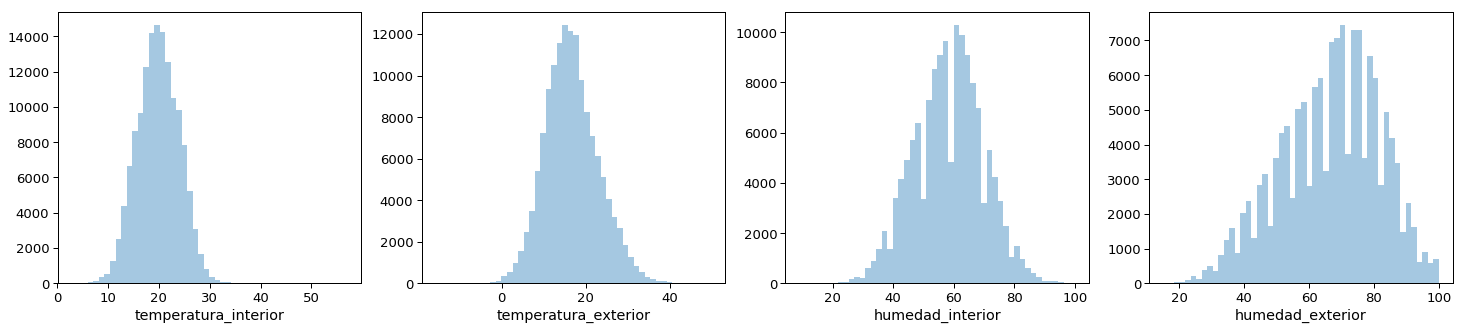

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(25,5))

for i in range(len(VARIABLES)):
    sns.distplot(df_sample[VARIABLES[i]].dropna(), hist=True, kde=False, ax=ax[i])
    
plt.show()

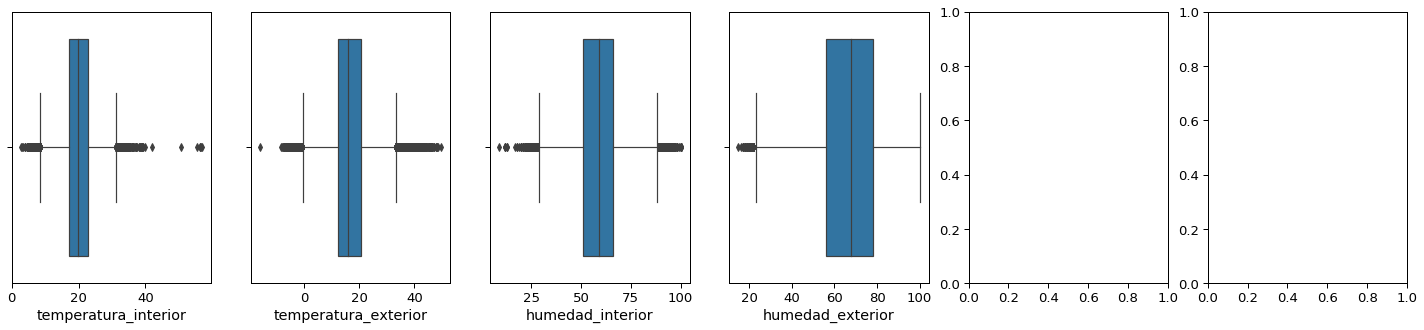

In [12]:
fig, ax = plt.subplots(1, 6, figsize=(25,5))

for i in range(len(VARIABLES)):
    sns.boxplot(x=df_sample[VARIABLES[i]].dropna(), ax=ax[i], orient="h")

## Deteccción de outliers multi-variado

https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/

In [13]:
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
display(df_sample.head())
print(df_sample.shape)

,id,dispositivo_id,vivienda_id,temperatura_interior,humedad_interior,co2,ruido,temperatura_exterior,humedad_exterior,measured_at,date_measured_at,epoca
4690733,4690734,142.0,145,23.4,30,440.0,46.0,20.8,42,1553140800,2019-03-21 04:00:00,otoño
3923140,3923141,302.0,290,18.2,53,333.0,39.0,9.3,90,1537353000,2018-09-19 10:30:00,invierno
2893543,2893544,260.0,255,19.7,64,1677.0,67.0,16.1,60,1522971000,2018-04-05 23:30:00,otoño
277029,277030,58.0,71,16.3,50,314.0,36.0,10.7,61,1493280000,2017-04-27 08:00:00,otoño
3074102,3074103,176.0,180,18.3,64,581.0,36.0,12.5,87,1525325400,2018-05-03 05:30:00,otoño


(141945, 12)


In [14]:
# Se trasnforma la data para que quede toda junta
x1 = df_sample['temperatura_interior'].values.reshape(-1,1)
x2 = df_sample['humedad_interior'].values.reshape(-1,1)
x3 = df_sample['temperatura_exterior'].values.reshape(-1,1)
x4 = df_sample['humedad_exterior'].values.reshape(-1,1)

X = np.concatenate((x1,x2, x3, x4),axis=1)

In [17]:
def getOutliers(model, X):
    # Anormality score
    # scores_pred = model.decision_function(X) * -1
    y_pred = model.predict(X)
    
    # Muestra por pantalla el número de outliers
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    print('OUTLIERS : ', n_outliers,'INLIERS : ',n_inliers)
    return y_pred

In [18]:
# Porcentage de outliers en la muestra
OUTLIERS_FRACTION = 0.05

model = IForest(contamination=OUTLIERS_FRACTION, random_state= 22, behaviour='new')
model.fit(X)

outlierIndex = getOutliers(model, X)

OUTLIERS :  7098 INLIERS :  134847


## Rellenado de data faltante

In [3]:
HASH_OF_TIME_SERIES = {}

TARGET_DF = df

# TODO: Ver que está pasando entre lo que dice el segundo y la fecha
# TARGET_DF.date_measured_at = pd.to_datetime(TARGET_DF.measured_at, unit='s')
display(TARGET_DF.head())

for i, g in TARGET_DF.groupby('vivienda_id'):
    HASH_OF_TIME_SERIES[i] = g.set_index('date_measured_at')
    
display(HASH_OF_TIME_SERIES[2].head())

,id,dispositivo_id,vivienda_id,temperatura_interior,humedad_interior,co2,ruido,temperatura_exterior,humedad_exterior,measured_at,date_measured_at
0,1,NaN,3,26.3,48,NaN,NaN,27.5,35,1448569800,2015-11-26 20:30:00
1,2,NaN,3,25.2,47,42.0,66.0,25.4,35,1448571600,2015-11-26 21:00:00
2,3,NaN,3,23.9,45,130.0,59.0,23.4,38,1448573400,2015-11-26 21:30:00
3,4,NaN,3,23.3,46,278.0,44.0,22.4,38,1448575200,2015-11-26 22:00:00
4,5,NaN,3,24.0,46,399.0,44.0,21.5,39,1448577000,2015-11-26 22:30:00


,id,dispositivo_id,vivienda_id,temperatura_interior,humedad_interior,co2,ruido,temperatura_exterior,humedad_exterior,measured_at
date_measured_at,,,,,,,,,,
2016-01-01 03:00:00,3084,1.0,2,25.0,46,438.0,66.0,21.5,48,1451617200
2016-01-01 03:30:00,3089,1.0,2,24.9,45,441.0,69.0,21.5,47,1451619000
2016-01-01 04:00:00,3094,1.0,2,24.8,45,473.0,60.0,21.7,46,1451620800
2016-01-01 04:30:00,3099,1.0,2,24.5,45,445.0,59.0,21.7,46,1451622600
2016-01-01 05:00:00,3104,1.0,2,24.2,45,429.0,59.0,21.4,46,1451624400


In [4]:
houses_to_work_count = 0
for i in HASH_OF_TIME_SERIES.keys():
    temp = HASH_OF_TIME_SERIES[i].resample('30min').mean()
    missing_rate = (temp.isna().sum()/len(temp) * 100).temperatura_interior
    if missing_rate <= 10:
        houses_to_work_count+=1
        print("Casa {}, Porcentage de null: {}%".format(i, missing_rate))
        
print("Cantidad de casas con las que trabajar:", houses_to_work_count)
print("Total casas:", len(HASH_OF_TIME_SERIES.keys()))

Casa 3, Porcentage de null: 1.299164822614034%
Casa 4, Porcentage de null: 3.69462655474542%
Casa 5, Porcentage de null: 1.5388257575757576%
Casa 11, Porcentage de null: 7.455128397207324%
Casa 12, Porcentage de null: 2.6468910439247004%
Casa 13, Porcentage de null: 1.0796377989319712%
Casa 14, Porcentage de null: 0.06775067750677506%
Casa 18, Porcentage de null: 8.599561029142787%
Casa 19, Porcentage de null: 1.0313926618948317%
Casa 21, Porcentage de null: 0.0%
Casa 22, Porcentage de null: 1.5510204081632653%
Casa 25, Porcentage de null: 8.699324324324325%
Casa 26, Porcentage de null: 0.3108486167236556%
Casa 27, Porcentage de null: 9.544253632760897%
Casa 38, Porcentage de null: 6.184574050135605%
Casa 43, Porcentage de null: 6.41781270464964%
Casa 44, Porcentage de null: 6.1699699953513925%
Casa 45, Porcentage de null: 3.795794207115461%
Casa 47, Porcentage de null: 8.043865508795369%
Casa 53, Porcentage de null: 0.33770619560981946%
Casa 54, Porcentage de null: 4.731550580431178%


In [5]:
import math

HOUSE_IN_STUDY = 2#16

temp = HASH_OF_TIME_SERIES[HOUSE_IN_STUDY] #.resample('30min').mean()
lakes = []
lake=[]
in_lake = False

inicio = True
fechas = []

for index, row in temp.iterrows():
    
    temperatura = getattr(row, 'temperatura_interior')
    fecha = index
    
    if inicio:
        fechas.append(fecha)
        inicio = False
    
    # Caso en que se inicia una laguna
    if math.isnan(temperatura) and not in_lake:
        in_lake = True
        lake.append(fecha)
        
    # Caso termina laguna
    elif in_lake and not math.isnan(temperatura):
        in_lake = False
        lake.append(fecha)
        lakes.append(lake)
        lake = list()
        
fechas.append(index)

In [11]:
print(fechas)
for x, y in lakes:
    print(y-x)
    
if len(lakes) == 0:
    print("Está llena al 100%")

[Timestamp('2016-01-01 03:00:00'), Timestamp('2019-01-12 17:00:00')]
Está llena al 100%


In [25]:
HASH_OF_TIME_SERIES.keys()

dict_keys([2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

## Armando la matriz

In [6]:
display(HASH_OF_TIME_SERIES[2].head(3))
print(HASH_OF_TIME_SERIES[2].shape)

,id,dispositivo_id,vivienda_id,temperatura_interior,humedad_interior,co2,ruido,temperatura_exterior,humedad_exterior,measured_at
date_measured_at,,,,,,,,,,
2016-01-01 03:00:00,3084,1.0,2,25.0,46,438.0,66.0,21.5,48,1451617200
2016-01-01 03:30:00,3089,1.0,2,24.9,45,441.0,69.0,21.5,47,1451619000
2016-01-01 04:00:00,3094,1.0,2,24.8,45,473.0,60.0,21.7,46,1451620800


(42642, 10)


In [20]:
from sklearn.preprocessing import RobustScaler
VARIABLES_TO_LAG = ["temperatura_interior", "humedad_interior", "temperatura_exterior", "humedad_exterior"]

lag_format = "{}_lag_{}"

TRAIN_LENGTH = int(HASH_OF_TIME_SERIES[2].shape[0] * 0.8)

print(TRAIN_LENGTH)

# TODO: Quizá re pensar esto por temas de memoria un diccionario no es lo mejor

scalers_dict = dict()
scalers_dict[2] = {'temperatura_interior': RobustScaler(), 'humedad_interior': RobustScaler(), 'temperatura_exterior': RobustScaler(), 'humedad_exterior': RobustScaler()}

def generate_lag(series, lag):
    
    copy = series.copy()

    for i in range(1, lag+1):
    
        for column_name in VARIABLES_TO_LAG:
            # Se le hace fit al scaler
            scalers_dict[2][column_name].fit( np.expand_dims(copy[column_name], axis=1))
            
            # Se transforma la data
            copy[column_name] = scalers_dict[2][column_name].transform(np.expand_dims(copy[column_name], axis=1))
            
            # Se manda a hacer shift
            copy[lag_format.format(column_name, i)] = copy[column_name].shift(periods=i, fill_value=0)
                
    return copy


def standarize_train(series, house_number):
    copy = series.copy()
    
    for column_name in VARIABLES_TO_LAG:
        # Se le hace fit al scaler
        scalers_dict[house_number][column_name].fit( np.expand_dims(copy[column_name], axis=1))

        # Se transforma la data
        copy[column_name] = scalers_dict[2][column_name].transform(np.expand_dims(copy[column_name], axis=1))

    return copy

def standarize_val(series, house_number):
    copy = series.copy()
    for column_name in VARIABLES_TO_LAG:
        # Se transforma la data
        copy[column_name] = scalers_dict[2][column_name].transform(np.expand_dims(copy[column_name], axis=1))
        
    return copy
                
# a = generate_lag(HASH_OF_TIME_SERIES[2][0:TRAIN_LENGTH], 2)

a = standarize_train(HASH_OF_TIME_SERIES[2][0:TRAIN_LENGTH], 2)

a_val = standarize_val(HASH_OF_TIME_SERIES[2][TRAIN_LENGTH:], 2)

display(a.head())
display(a.describe())

34113


,id,dispositivo_id,vivienda_id,temperatura_interior,humedad_interior,co2,ruido,temperatura_exterior,humedad_exterior,measured_at
date_measured_at,,,,,,,,,,
2016-01-01 03:00:00,3084,1.0,2,0.519481,-0.666667,438.0,66.0,0.478723,-0.555556,1451617200
2016-01-01 03:30:00,3089,1.0,2,0.506494,-0.733333,441.0,69.0,0.478723,-0.592593,1451619000
2016-01-01 04:00:00,3094,1.0,2,0.493506,-0.733333,473.0,60.0,0.500000,-0.629630,1451620800
2016-01-01 04:30:00,3099,1.0,2,0.454545,-0.733333,445.0,59.0,0.500000,-0.629630,1451622600
2016-01-01 05:00:00,3104,1.0,2,0.415584,-0.733333,429.0,59.0,0.468085,-0.629630,1451624400


,id,dispositivo_id,vivienda_id,temperatura_interior,humedad_interior,co2,ruido,temperatura_exterior,humedad_exterior,measured_at
count,3.411300e+04,34113.0,34113.0,34113.000000,34113.000000,34113.000000,34113.000000,34113.000000,34113.000000,3.411300e+04
mean,9.592399e+05,1.0,2.0,-0.066323,-0.032926,601.701404,52.663970,0.042371,-0.025268,1.488993e+09
std,1.213993e+06,0.0,0.0,0.569387,0.714830,444.687655,5.531763,0.684821,0.657738,2.491304e+07
min,3.084000e+03,1.0,2.0,-1.324675,-2.133333,311.000000,38.000000,-1.712766,-1.814815,1.451617e+09
25%,8.014000e+04,1.0,2.0,-0.597403,-0.533333,449.000000,50.000000,-0.489362,-0.518519,1.467020e+09
50%,1.440060e+05,1.0,2.0,0.000000,0.000000,502.000000,54.000000,0.000000,0.000000,1.485405e+09
75%,2.211108e+06,1.0,2.0,0.402597,0.466667,582.000000,55.000000,0.510638,0.481481,1.515328e+09
max,3.467352e+06,1.0,2.0,1.480519,2.000000,4996.000000,86.000000,2.085106,1.370370,1.530724e+09


In [5]:
def generate_lag_2(series, lag):
    
    X = list()
    Y = list()
    
    last_seen = list()
    
    for index, row in series.iterrows():
        
        current_record = [row['temperatura_interior'], row['humedad_interior'], row['temperatura_exterior'], row['humedad_exterior']]
        
        # print(current_record)
        
        if len(last_seen) < lag:
            last_seen.append(current_record)
            
        else:
            # print("Mostrando current_record:", current_record)
            
            # print("Mostrando last_seen:",last_seen)
            Y.append(list(current_record))
            X.append(list(last_seen))
            
            # print("Mostrando x", X)
            # print("Mostrando y", Y)
            
            del last_seen[0]
            last_seen.append(current_record)
            
        
            
    return np.asarray(X),np.asarray(Y)
                                   
X_train, Y_train = generate_lag_2(a, 2)  
X_val, Y_val = generate_lag_2(a_val, 2)  

print("Train:",X_train.shape,"Val:",X_val.shape)

Train: (34111, 2, 4) Val: (8527, 2, 4)


In [56]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout, TimeDistributed, CuDNNGRU, GRU

model = Sequential()
model.add(CuDNNGRU(input_shape=(2, 4), units=100, return_sequences=False))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(4))
# model.add(Dense(4, activation='tanh'))
model.compile(loss='mean_squared_error', optimizer='adam')#, metrics=['mean_absolute_percentage_error'])  
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnngru_1 (CuDNNGRU)       (None, 100)               31800     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 516       
Total params: 61,756
Trainable params: 61,756
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=15, batch_size=256, verbose=1)

Train on 34111 samples, validate on 8527 samples
Epoch 1/15
34111/34111 [==============================] - 3s 85us/step - loss: 0.0306 - val_loss: 0.0077
Epoch 2/15
34111/34111 [==============================] - 0s 13us/step - loss: 0.0049 - val_loss: 0.0055
Epoch 3/15
34111/34111 [==============================] - 0s 12us/step - loss: 0.0032 - val_loss: 0.0038
Epoch 4/15
34111/34111 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.0034
Epoch 5/15
34111/34111 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0032
Epoch 6/15
34111/34111 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 0.0031
Epoch 7/15
34111/34111 [==============================] - 1s 15us/step - loss: 0.0021 - val_loss: 0.0031
Epoch 8/15
34111/34111 [==============================] - 0s 15us/step - loss: 0.0021 - val_loss: 0.0031
Epoch 9/15
34111/34111 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 0.0028
Epoch 

In [35]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

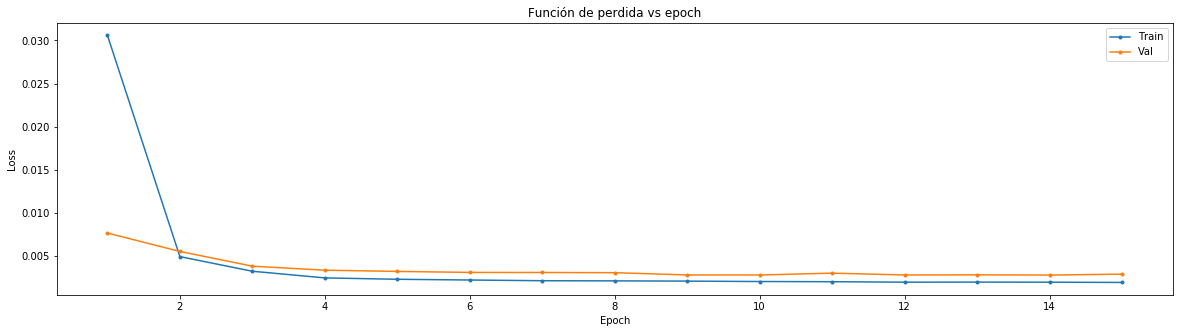

In [58]:
def chart_loss(history, epoch_number):
    epoch_arr = [i+1 for i in range(epoch_number)]
    plt.figure(figsize = (20,5))
    plt.plot(epoch_arr, history.history['loss'], '.-')
    plt.plot(epoch_arr, history.history['val_loss'], '.-')
    # plt.plot(epoch_arr, history.history['val_mean_absolute_percentage_error'], '.-')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend( ('Train', 'Val', 'MAE') )
    plt.title("Función de perdida vs epoch")

    # min_index = np.argmin(history.history['val_loss'])
    # min_value = history.history['val_mean_absolute_percentage_error'][min_index].round(3)
    # plt.annotate('Min = {}'.format(min_value), xy=(min_index+1, min_value), xycoords='data', xytext=(-100, 100), textcoords='offset points', fontsize=14, arrowprops=dict(arrowstyle="->"))


    plt.show()

chart_loss(history, 15)

In [59]:
y_pred = model.predict(X_val)

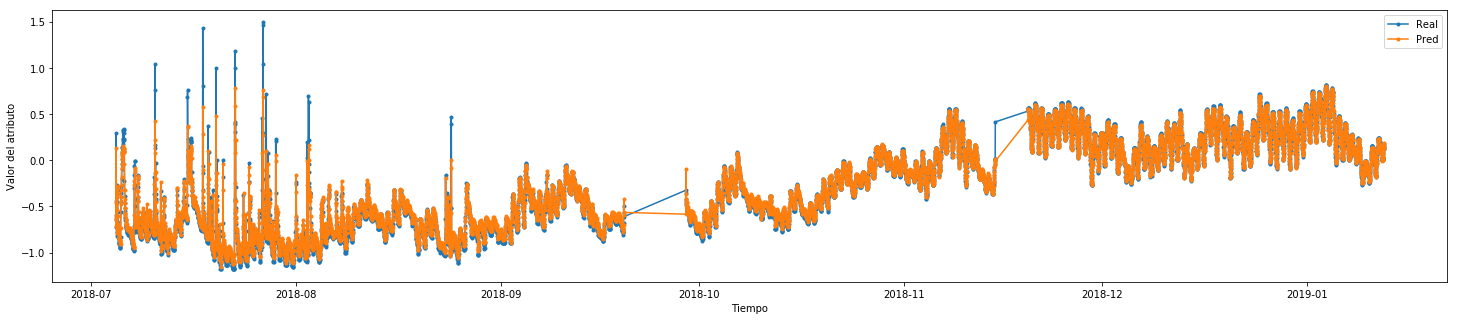

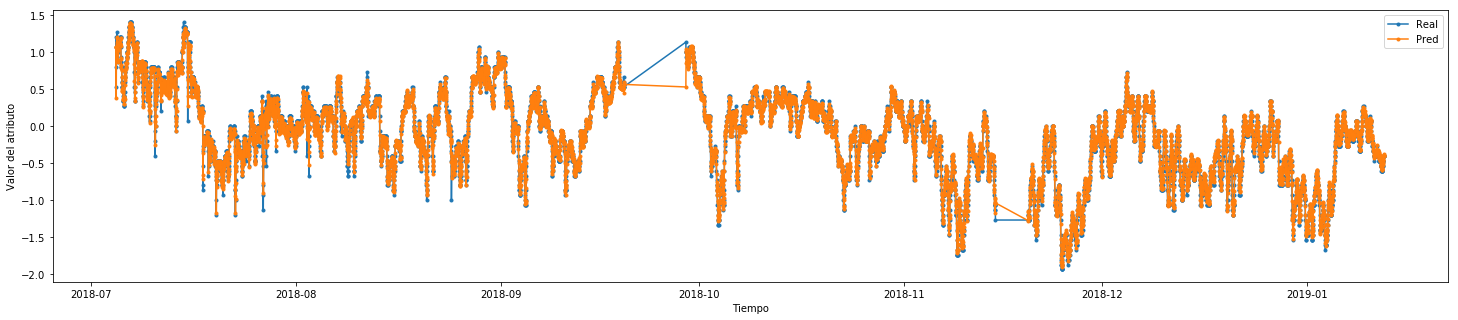

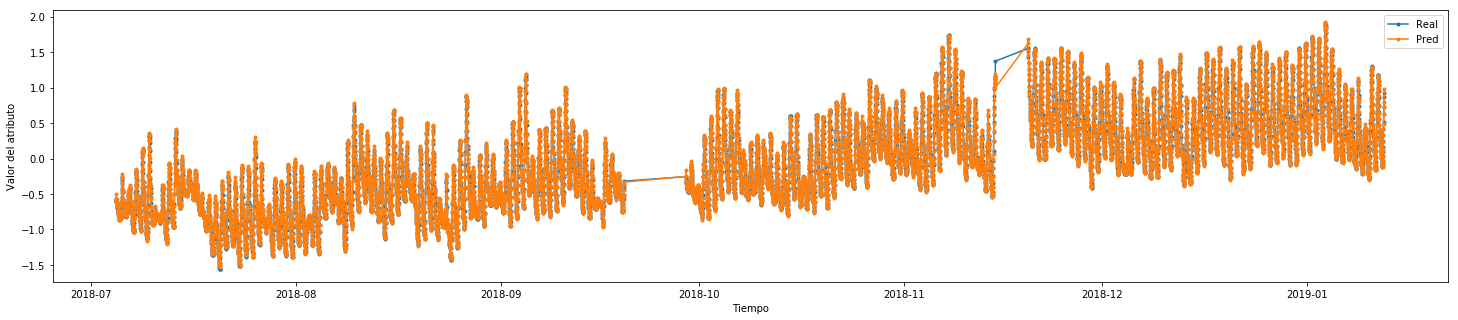

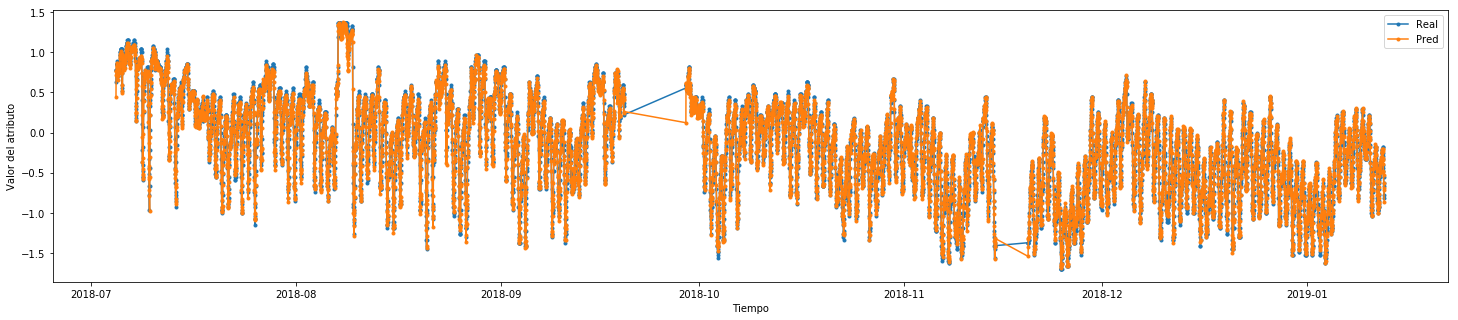

In [60]:
def chart_predictions(truth, pred, column_target=0):
    plt.figure(figsize = (25,5))
    
    #examples_count = truth.shape[0]
    
    #plt.plot(range(1,examples_count+1), truth[:,column_target], '.-')
    #plt.plot(range(1,examples_count+1), pred[:,column_target], '.-')
    
    time = list(HASH_OF_TIME_SERIES[2][TRAIN_LENGTH+2:].index)
    
    plt.plot(time, truth[:,column_target], '.-')
    plt.plot(time, pred[:,column_target], '.-')
    
    plt.xlabel('Tiempo')
    plt.ylabel('Valor del atributo')
    plt.legend( ('Real', 'Pred') )
    
    plt.show()
    
chart_predictions(Y_val, y_pred, 0)
chart_predictions(Y_val, y_pred, 1)
chart_predictions(Y_val, y_pred, 2)
chart_predictions(Y_val, y_pred, 3)

array([[-0.5974026 ,  1.2       , -0.57446809,  0.62962963],
       [ 0.2987013 ,  0.53333333, -0.59574468,  0.77777778]])

## Caracterización casas

In [5]:
df_casas = pd.read_csv("./datasets/RENAM_encuesta_inicial.csv")

In [6]:
# Se pasa el vivienda_id
def clean_id( x ):
    return int(x[2:])
   
df_casas['vivienda_id'] = np.vectorize(clean_id)(df_casas['ID'])

In [7]:
print(df_casas.shape)
df_casas.head(3)

(293, 83)


,ID,Fecha de Instalación del sensor,Región,Ciudad,Comuna,N° de personas que componen el hogar (incluyendo el encuestado),N° de personas del hogar menores de 14 años,N° de personas del hogar mayores de 14 años y menores de 65 años,N° de personas del hogar mayores de 65 años,Parentesco con jefe(a) de hogar,...,Respecto a la sensación térmica de la vivienda [Otoño],Respecto a la sensación térmica de la vivienda [Invierno],Respecto a la sensación térmica de la vivienda [Primavera],Respecto a la sensación térmica de la vivienda [Verano],¿Qué área(s) de la vivienda es (son) la(s) más confortable(s)?,Lugar de la vivienda,Altura (metros),Lugar de la vivienda.1,Altura (metros).1,vivienda_id
0,NA002,3/27/2017,Metropolitana de Santiago,Santiago,Estación Central,2,NaN,2.0,NaN,Jefe (a) de hogar,...,Temperatura media,Frío,Temperatura media,Temperatura media,"Cocina, Terraza",Living,1.8,Patio trasero,1.8,2
1,NA003,3/24/2017,Metropolitana de Santiago,Santiago,Providencia,2,2.0,2.0,NaN,Servicio doméstico,...,Frío,Frío,Caluroso,Caluroso,"Cocina, Comedor, Living",Dormitorio Secundario,1.2,Balcón,2.2,3
2,NA004,2/7/2017,Metropolitana de Santiago,Santiago,Cerro Navia,5,2.0,3.0,NaN,Hijo(a) de ambos,...,Frío,Frío,Temperatura media,Temperatura media,"Comedor, Living",Living-comedor,2.0,Patio delantero,2.0,4


Voy a armar varios grupos con caracterizaciones tipo para ver de que tamaño quedan los grupos

In [10]:
print("- Ciudades")
display(df_casas.groupby(['Ciudad']).count()[['vivienda_id']])

print("- Año de contrucción")
display(df_casas.groupby(['Año de construcción de la vivienda']).count()[['vivienda_id']])

# print("- Personas en la casa")
# display(df_casas.groupby(['N° de personas que componen el hogar (incluyendo el encuestado)']).count()[['vivienda_id']])

print("- Origen de la vivienda")
display(df_casas.groupby(['¿Cuál es el origen de su vivienda?']).count()[['vivienda_id']])

print("- Ciudad + Año de contrucción")
display(df_casas.groupby(['Año de construcción de la vivienda', 'Ciudad', '¿Cuál es el origen de su vivienda?']).count()[['vivienda_id']])

- Ciudades


,vivienda_id
Ciudad,
Antofagasta,31
Coyhaique,11
Santiago,140
Temuco,50
Valparaíso,61


- Año de contrucción


,vivienda_id
Año de construcción de la vivienda,
Despues del 2007,92
Entre 2000 y 2007,50
Menor a 2000,147


- Origen de la vivienda


,vivienda_id
¿Cuál es el origen de su vivienda?,
Vivienda adquirida a inmobiliaria (Proyecto inmobiliario),180
Vivienda autoconstrucción,42
Vivienda social (Subsidio),58


- Ciudad + Año de contrucción


vivienda_id
Año de construcción de la vivienda Ciudad      ¿Cuál es el origen de su vivienda?                             
Despues del 2007                   Antofagasta Vivienda adquirida a inmobiliaria (Proyecto inm...            8
                                   Coyhaique   Vivienda adquirida a inmobiliaria (Proyecto inm...            2
                                               Vivienda social (Subsidio)                                    1
                                   Santiago    Vivienda adquirida a inmobiliaria (Proyecto inm...           27
                                               Vivienda autoconstrucción                                     3
                                               Vivienda social (Subsidio)                                    2
                                   Temuco      Vivienda adquirida a inmobiliaria (Proyecto inm...           21
                                               Vivienda autoconstrucción                                     2
                                               Vivienda social (Subsidio)                                    1
                                   Valparaíso  Vivienda adquirida a inmobiliaria (Proyecto inm...           16
                                               Vivienda autoconstrucción                                     3
                                               Vivienda social (Subsidio)                                    6
Entre 2000 y 2007                  Antofagasta Vivienda adquirida a inmobiliaria (Proyecto inm...            4
                                               Vivienda autoconstrucción                                     1
                                   Coyhaique   Vivienda adquirida a inmobiliaria (Proyecto inm...            1
                                               Vivienda autoconstrucción                                     1
                                               Vivienda social (Subsidio)                                    1
                                   Santiago    Vivienda adquirida a inmobiliaria (Proyecto inm...           19
                                               Vivienda social (Subsidio)                                    3
                                   Temuco      Vivienda adquirida a inmobiliaria (Proyecto inm...            8
                                               Vivienda social (Subsidio)                                    1
                                   Valparaíso  Vivienda adquirida a inmobiliaria (Proyecto inm...            5
                                               Vivienda autoconstrucción                                     2
                                               Vivienda social (Subsidio)                                    3
Menor a 2000                       Antofagasta Vivienda adquirida a inmobiliaria (Proyecto inm...            6
                                               Vivienda autoconstrucción                                     8
                                               Vivienda social (Subsidio)                                    4
                                   Coyhaique   Vivienda adquirida a inmobiliaria (Proyecto inm...            1
                                               Vivienda social (Subsidio)                                    4
                                   Santiago    Vivienda adquirida a inmobiliaria (Proyecto inm...           37
                                               Vivienda autoconstrucción                                    13
                                               Vivienda social (Subsidio)                                   21
                                   Temuco      Vivienda adquirida a inmobiliaria (Proyecto inm...            9
                                               Vivienda social (Subsidio)                                    6
                                   Valparaíso  Vivienda adquirida a inmobiliaria (Proyecto inm...      

In [7]:
i = 0
for x in df_casas.columns:
    print("{}, {}".format(i, x))
    i+=1

0, ID
1, Fecha de Instalación del sensor
2, Región
3, Ciudad
4, Comuna
5, N° de personas que componen el hogar (incluyendo el encuestado)
6, N° de personas del hogar menores de 14 años
7, N° de personas del hogar mayores de 14 años y menores de 65 años
8, N° de personas del hogar mayores de 65 años
9, Parentesco con jefe(a) de hogar
10, ¿Algún ocupante permanente de la vivienda sufre alguna de las siguientes enfermedades de manera recurrente? [Enfermedades respiratorias]
11, ¿Algún ocupante permanente de la vivienda sufre alguna de las siguientes enfermedades de manera recurrente? [Enfermedades cardíacas]
12, ¿Algún ocupante permanente de la vivienda sufre alguna de las siguientes enfermedades de manera recurrente? [Enfermedades auditivas]
13, ¿Algún ocupante permanente de la vivienda sufre alguna de las siguientes enfermedades de manera recurrente? [Dolores de cabeza o dificultad de la concentración]
14, ¿Algún ocupante permanente de la vivienda sufre alguna de las siguientes enfermed

In [101]:
relevant = [0, 2, 3, 4, 5, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 31, 32, 52, 53, 54, 66, 67, 73, 74, 75, 76]

# Ahora en la segunda 'iteración'
relevant2 = []

# Datos que me quedaron con duda 25 al 30

df_relevant = df_casas.iloc[:, relevant]

In [102]:
for x in df_relevant.columns:
    uniq = df_relevant[x].unique()
    print("=== {}: {} ===".format(x, len(uniq)))
    print(uniq)

=== ID: 293 ===
['NA002' 'NA003' 'NA004' 'NA009' 'NA010' 'NA012' 'NA016' 'NA017' 'NA018'
 'NA019' 'NA020' 'NA021' 'NA022' 'NA023' 'NA024' 'NA025' 'NA026' 'NA027'
 'NA028' 'NA029' 'NA030' 'NA031' 'NA032' 'NA033' 'NA034' 'NA035' 'NA036'
 'NA037' 'NA038' 'NA039' 'NA040' 'NA041' 'NA042' 'NA043' 'NA044' 'NA045'
 'NA046' 'NA047' 'NA048' 'NA049' 'NA050' 'NA051' 'NA052' 'NA053' 'NA054'
 'NA055' 'NA056' 'NA057' 'NA058' 'NA059' 'NA060' 'NA061' 'NA062' 'NA063'
 'NA064' 'NA065' 'NA066' 'NA067' 'NA068' 'NA069' 'NA070' 'NA071' 'NA072'
 'NA073' 'NA074' 'NA075' 'NA076' 'NA077' 'NA078' 'NA079' 'NA080' 'NA081'
 'NA082' 'NA083' 'NA084' 'NA085' 'NA086' 'NA087' 'NA088' 'NA089' 'NA090'
 'NA091' 'NA092' 'NA093' 'NA094' 'NA095' 'NA096' 'NA097' 'NA098' 'NA099'
 'NA100' 'NA101' 'NA102' 'NA103' 'NA104' 'NA105' 'NA106' 'NA107' 'NA108'
 'NA109' 'NA110' 'NA111' 'NA112' 'NA113' 'NA114' 'NA115' 'NA116' 'NA117'
 'NA118' 'NA119' 'NA120' 'NA121' 'NA122' 'NA123' 'NA124' 'NA125' 'NA126'
 'NA127' 'NA128' 'NA129' 'NA130' 'N

In [17]:
display(df_relevant.isnull().sum())

ID                                                                                                                                                                     0
Región                                                                                                                                                                 0
Ciudad                                                                                                                                                                 0
Comuna                                                                                                                                                                 0
N° de personas que componen el hogar (incluyendo el encuestado)                                                                                                        0
Año de construcción de la vivienda                                                                                                                         

## Anexo: Importar dataset a bd en postgres

In [33]:
# Código que importa el csv a postgres
import psycopg2

def export_to_db():
    try:
        connection = psycopg2.connect(user = "postgres",
                                      password = "abc123",
                                      host = "127.0.0.1",
                                      port = "5432",
                                      database = "memoria")
        cursor = connection.cursor()

        insert_rows_format = '''
        insert into mediciones_netatmo
        (dispositivo_id, vivienda_id, sector, temperatura, humedad, co2, ruido, measured_at, date_measured_at)
        values ({}, {}, {}, {}, {}, {}, {}, {}, '{}'),
        '''
        row_format = "({}, {}, {}, {}, {}, {}, {}, {}, '{}')"
        i = 0
        for row in df.itertuples(index=True, name='Pandas'):
            # print getattr(row, "c1"), getattr(row, "c2")

            sector = False

            dispositivo_id = getattr(row, 'dispositivo_id')
            vivienda_id = getattr(row, 'vivienda_id')

            if getattr(row, 'sector') == 1:
                sector = True

            temperatura = getattr(row, 'temperatura')
            humedad = getattr(row, 'humedad')
            co2 = getattr(row, 'co2')
            ruido = getattr(row, 'ruido')
            measured_at = getattr(row, 'measured_at')
            date_measured_at = pd.to_datetime(measured_at, unit='s')

            if i == 0:
                SQL = insert_rows_format.format(dispositivo_id, vivienda_id, sector, temperatura, humedad, co2, ruido, measured_at, date_measured_at)
            elif i < 20000:
                SQL+= row_format.format(dispositivo_id, vivienda_id, sector, temperatura, humedad, co2, ruido, measured_at, date_measured_at)+","
            else:
                SQL+= row_format.format(dispositivo_id, vivienda_id, sector, temperatura, humedad, co2, ruido, measured_at, date_measured_at)
                SQL = SQL.replace("nan", "NULL")
                cursor.execute(SQL)
                connection.commit()
                SQL = ""
                i = -1
            i+=1

        if SQL != "":
            SQL+= row_format.format(dispositivo_id, vivienda_id, sector, temperatura, humedad, co2, ruido, measured_at, date_measured_at)
            SQL = SQL.replace("nan", "NULL")
            cursor.execute(SQL)
            connection.commit()

    except (Exception, psycopg2.Error) as error :
        print ("Error while connecting to PostgreSQL", error)
    finally:
        #closing database connection.
            if(connection):
                cursor.close()
                connection.close()
                print("PostgreSQL connection is closed")
                
# export_to_db()

PostgreSQL connection is closed
